In [1]:
import pickle
import pandas as pd
import numpy as np
import torch
import transformers
import bitsandbytes as bnb
import networkx as nx

random_state = 1

In [2]:
def euclid(list1, list2):
    return sum((p-q)**2 for p, q in zip(list1, list2)) ** .5

In [3]:
with open('df_policies_embeddings.pkl', 'rb') as f:
    df = pickle.load(f)
df

,name,text,Level,document_name,Type,embeddings
0,Category,ACCOUNT INFORMATION,None,Fitbit.txt,Closed,"[1.376953125, -1.1220703125, 1.982421875, 1.12..."
1,SubCategory,your name,None,Fitbit.txt,Closed,"[0.276123046875, 0.7734375, 0.53076171875, 1.2..."
2,SubCategory,email address,None,Fitbit.txt,Closed,"[1.5146484375, -0.07098388671875, 0.3347167968..."
3,SubCategory,password,None,Fitbit.txt,Closed,"[0.436279296875, -0.021484375, 0.6201171875, -..."
4,SubCategory,date of birth,None,Fitbit.txt,Closed,"[0.5732421875, -1.681640625, -0.114990234375, ..."
...,...,...,...,...,...,...
4113,Category,your contact information,None,Snapchat.txt,Closed,"[1.708984375, -0.94384765625, 0.984375, 0.6762..."
4114,SubCategory,information from third parties,None,Snapchat.txt,Open,"[0.6962890625, -1.0859375, 0.611328125, 0.6069..."
4115,cat,"Or, if you provide us with your contact inform...",2,Snapchat.txt,None,"[0.485107421875, -2.080078125, 0.92724609375, ..."
4116,cat,"Other Information, With Your Permission",2,Snapchat.txt,None,"[0.6630859375, -1.1650390625, 0.44580078125, 1..."


In [4]:
validation_set = ['X_Twitter.txt', 'LinkedIn.txt', 'Zoom.txt', 'Fitbit.txt', 'Western Union.txt', 'Ubisoft.txt']
test_set =  ['Yahoo.txt', 'TikTok.txt', 'MySugr.txt', 'Deliveroo.txt', 'Paypal.txt', 'AdobePhotoshop.txt']
nontrain_set = validation_set + test_set
nontrain_set

['X_Twitter.txt',
 'LinkedIn.txt',
 'Zoom.txt',
 'Fitbit.txt',
 'Western Union.txt',
 'Ubisoft.txt',
 'Yahoo.txt',
 'TikTok.txt',
 'MySugr.txt',
 'Deliveroo.txt',
 'Paypal.txt',
 'AdobePhotoshop.txt']

In [5]:
df_train = df[~df.document_name.isin(nontrain_set)]
df_train = df_train.dropna(subset = ['Level'])
df_train

,name,text,Level,document_name,Type,embeddings
170,cat,"Personal Identifiers\ta real name, birth date,...",1,Kardia.txt,None,"[-0.73779296875, -0.94873046875, 2.50390625, 0..."
177,cat,"Race, Color, Age, National origin, or Disability",2,Kardia.txt,None,"[-0.06195068359375, -0.273681640625, -0.146484..."
178,cat,Characteristics of protected classifications u...,2,Kardia.txt,None,"[0.59326171875, -0.6298828125, -0.58984375, 1...."
183,cat,"Biometric information\tPhotos, video, and voice",2,Kardia.txt,None,"[-0.38134765625, -1.7529296875, 1.4677734375, ..."
195,cat,Internet or other electronic network activity ...,2,Kardia.txt,None,"[-0.671875, -0.97802734375, 0.314208984375, 1...."
...,...,...,...,...,...,...
4110,cat,The last category of data we collect is inform...,2,Snapchat.txt,None,"[0.80078125, -1.2626953125, 0.30419921875, 0.0..."
4112,cat,This includes linked third-party service data ...,2,Snapchat.txt,None,"[-0.57177734375, -1.00390625, 0.8095703125, -0..."
4115,cat,"Or, if you provide us with your contact inform...",2,Snapchat.txt,None,"[0.485107421875, -2.080078125, 0.92724609375, ..."
4116,cat,"Other Information, With Your Permission",2,Snapchat.txt,None,"[0.6630859375, -1.1650390625, 0.44580078125, 1..."


In [103]:
df_train_lv1 = df_train[df_train['Level'] == '1']
df_train_lv1

,name,text,Level,document_name,Type,embeddings
170,cat,"Personal Identifiers\ta real name, birth date,...",1,Kardia.txt,None,"[-0.73779296875, -0.94873046875, 2.50390625, 0..."
200,cat,Geolocation data\tPhysical location or movemen...,1,Kardia.txt,None,"[-0.74658203125, -0.58056640625, 1.771484375, ..."
222,cat,"When you contact AliveCor directly, such as wh...",1,Kardia.txt,None,"[1.3701171875, -0.783203125, 0.92431640625, -0..."
223,cat,When You Contact Us.,1,Kardia.txt,None,"[0.00887298583984375, -0.51806640625, 0.136352..."
241,cat,"If you choose to buy a Product on our Site, we...",1,Ava.txt,None,"[1.1845703125, -1.4677734375, 2.27734375, 0.14..."
...,...,...,...,...,...,...
3713,cat,"For example, we create a permanent URL to your...",1,Groupon.txt,None,"[0.69921875, -1.24609375, 0.68017578125, 1.434..."
3996,cat,"We may use your information, including your fu...",1,Airbnb.txt,None,"[0.94873046875, -1.134765625, 0.73291015625, -..."
4086,cat,"To do this, we ask you to provide us with acco...",1,Snapchat.txt,None,"[0.5029296875, -1.318359375, 1.25390625, -0.39..."
4088,cat,If you use our commerce products to buy someth...,1,Snapchat.txt,None,"[0.88720703125, -1.203125, 1.712890625, 0.3522..."


In [104]:
distances = []
for j in range(len(df_train_lv1)):
    newlist = []
    for i in range(len(df_train_lv1)):
        newlist.append(euclid(df_train_lv1.iloc[j]['embeddings'], df_train_lv1.iloc[i]['embeddings']))
    distances.append(newlist)
    print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


sqrt(101*25) = 50.249

In [187]:
closenodes = []
for el in distances:
    count = 0
    for newel in el:
        if newel <= 47.93:      #set manually, with 69.64 on average the extracted subgraph has (N*25)**0.5 nodes, with 45.41 the nodes are connected to 1% of other nodes, on average
                                #112.86 double nodes                                                                 42.85, .5% of other nodes                                                      
                                #61.51 half nodes                                                                   47.93, 2% of other nodes
            count += 1
    closenodes.append(count)

print(sum(closenodes)/len(closenodes))  #average size of extracted subgraph
print(min(closenodes))                  #min degree
print(max(closenodes))                  #max degree

3.0392156862745097
1
13


In [189]:
Training_graph = nx.Graph()

for i in range(len(df_train_lv1)):
    print('adding node',i)
    Training_graph.add_node(i)
    for j in range(i):
        if euclid(df_train_lv1.iloc[j]['embeddings'], df_train_lv1.iloc[i]['embeddings']) <= 45.41:      #così in media ogni nodo è collegato all'1% degli altri nodi, in media
            Training_graph.add_edge(i,j)

adding node 0
adding node 1
adding node 2
adding node 3
adding node 4
adding node 5
adding node 6
adding node 7
adding node 8
adding node 9
adding node 10
adding node 11
adding node 12
adding node 13
adding node 14
adding node 15
adding node 16
adding node 17
adding node 18
adding node 19
adding node 20
adding node 21
adding node 22
adding node 23
adding node 24
adding node 25
adding node 26
adding node 27
adding node 28
adding node 29
adding node 30
adding node 31
adding node 32
adding node 33
adding node 34
adding node 35
adding node 36
adding node 37
adding node 38
adding node 39
adding node 40
adding node 41
adding node 42
adding node 43
adding node 44
adding node 45
adding node 46
adding node 47
adding node 48
adding node 49
adding node 50
adding node 51
adding node 52
adding node 53
adding node 54
adding node 55
adding node 56
adding node 57
adding node 58
adding node 59
adding node 60
adding node 61
adding node 62
adding node 63
adding node 64
adding node 65
adding node 66
addin

In [190]:
pickle.dump(Training_graph, open('lv1graph_Level_.01.pickle', 'wb'))


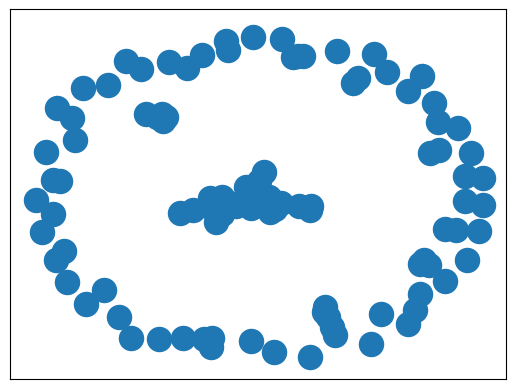

In [191]:
nx.draw_networkx(Training_graph, with_labels = False)

adding node 0
adding node 1
adding node 2
adding node 3
adding node 4
adding node 5
adding node 6
adding node 7
adding node 8
adding node 9
adding node 10
adding node 11
adding node 12
adding node 13
adding node 14
adding node 15
adding node 16
adding node 17
adding node 18
adding node 19
adding node 20
adding node 21
adding node 22
adding node 23
adding node 24
adding node 25
adding node 26
adding node 27
adding node 28
adding node 29
adding node 30
adding node 31
adding node 32
adding node 33
adding node 34
adding node 35
adding node 36
adding node 37
adding node 38
adding node 39
adding node 40
adding node 41
adding node 42
adding node 43
adding node 44
adding node 45
adding node 46
adding node 47
adding node 48
adding node 49
adding node 50
adding node 51
adding node 52
adding node 53
adding node 54
adding node 55
adding node 56
adding node 57
adding node 58
adding node 59
adding node 60
adding node 61
adding node 62
adding node 63
adding node 64
adding node 65
adding node 66
addin

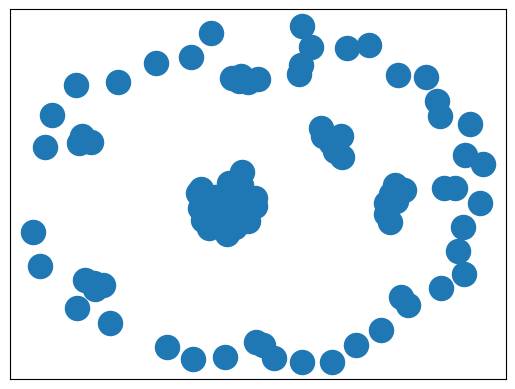

In [192]:
Training_graph = nx.Graph()

for i in range(len(df_train_lv1)):
    print('adding node',i)
    Training_graph.add_node(i)
    for j in range(i):
        if euclid(df_train_lv1.iloc[j]['embeddings'], df_train_lv1.iloc[i]['embeddings']) <= 47.93:      #così in media ogni nodo è collegato al 2% degli altri nodi, in media
            Training_graph.add_edge(i,j)

pickle.dump(Training_graph, open('lv1graph_Level_.02.pickle', 'wb'))
nx.draw_networkx(Training_graph, with_labels = False)

adding node 0
adding node 1
adding node 2
adding node 3
adding node 4
adding node 5
adding node 6
adding node 7
adding node 8
adding node 9
adding node 10
adding node 11
adding node 12
adding node 13
adding node 14
adding node 15
adding node 16
adding node 17
adding node 18
adding node 19
adding node 20
adding node 21
adding node 22
adding node 23
adding node 24
adding node 25
adding node 26
adding node 27
adding node 28
adding node 29
adding node 30
adding node 31
adding node 32
adding node 33
adding node 34
adding node 35
adding node 36
adding node 37
adding node 38
adding node 39
adding node 40
adding node 41
adding node 42
adding node 43
adding node 44
adding node 45
adding node 46
adding node 47
adding node 48
adding node 49
adding node 50
adding node 51
adding node 52
adding node 53
adding node 54
adding node 55
adding node 56
adding node 57
adding node 58
adding node 59
adding node 60
adding node 61
adding node 62
adding node 63
adding node 64
adding node 65
adding node 66
addin

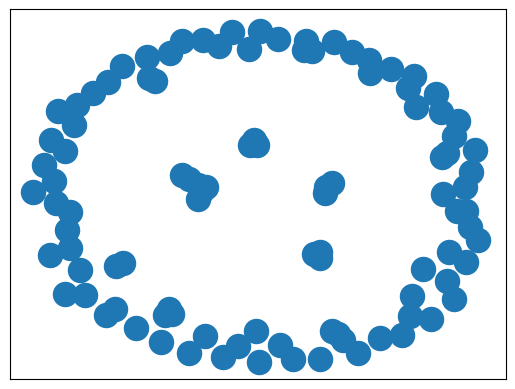

In [193]:
Training_graph = nx.Graph()

for i in range(len(df_train_lv1)):
    print('adding node',i)
    Training_graph.add_node(i)
    for j in range(i):
        if euclid(df_train_lv1.iloc[j]['embeddings'], df_train_lv1.iloc[i]['embeddings']) <= 42.85:      #così in media ogni nodo è collegato al .5% degli altri nodi, in media
            Training_graph.add_edge(i,j)

pickle.dump(Training_graph, open('lv1graph_Level_.005.pickle', 'wb'))
nx.draw_networkx(Training_graph, with_labels = False)